In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split

from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #choose whether to use gpu or cpu

In [3]:
# data_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\Outputs_Grayscale_Labelled_Images_Sizes\size_folder'  #path to the folder containing the images
# data_dir = r'C:\Users\Public\PartIIB project 2023_2024\PastData\helical_size'
# first_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\Outputs_Grayscale_Labelled_Images_Sizes\size_folder\first_half\first_quarter'     #Bruno's computer
# second_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\Outputs_Grayscale_Labelled_Images_Sizes\size_folder\first_half\second_quarter'
# third_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\Outputs_Grayscale_Labelled_Images_Sizes\size_folder\second_half\third_quarter'
# fourth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\Outputs_Grayscale_Labelled_Images_Sizes\size_folder\second_half\fourth_quarter'

# first_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\first_fifth'
# second_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\second_fifth'
# third_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\third_fifth'
# fourth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\fourth_fifth'
# fifth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\fifth_fifth'

# first_dir = r'C:\Users\Chappyyyyyy\Documents\size_folder\first_half\first_quarter' #chappy computer
# second_dir = r'C:\Users\Chappyyyyyy\Documents\size_folder\first_half\second_quarter'
# third_dir = r'C:\Users\Chappyyyyyy\Documents\size_folder\second_half\third_quarter'
# fourth_dir = r'C:\Users\Chappyyyyyy\Documents\size_folder\second_half\fourth_quarter'

first_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltrain/interval_1"
second_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltrain/interval_2"
third_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltrain/interval_3"
fourth_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltrain/interval_4"


In [4]:
# multi-input dataset
class CustomImageDataset(Dataset):
    def __init__(self, first_dir, second_dir, third_dir, fourth_dir, transform=None):
        self.first_dir = first_dir
        self.second_dir = second_dir
        self.third_dir = third_dir
        self.fourth_dir = fourth_dir
        self.transform = transform
        # self.images1 = sorted(os.listdir(first_dir))
        self.images1 = sorted(os.listdir(first_dir), key=self.custom_sort_key)
        self.images2 = sorted(os.listdir(second_dir), key=self.custom_sort_key)
        self.images3 = sorted(os.listdir(third_dir), key=self.custom_sort_key)
        self.images4 = sorted(os.listdir(fourth_dir), key=self.custom_sort_key)
        # self.labels1 = [self.extract_label(img) for img in self.images1]
        # self.labels2 = [self.extract_label(img) for img in self.images2]
        # self.labels3 = [self.extract_label(img) for img in self.images3]
        # self.labels4 = [self.extract_label(img) for img in self.images4]
        self.labels4 = [self.extract_label(img) for img in self.images4]
        self.cuttime = [self.extract_cuttime(img) for img in self.images4]
        
        #input verification
        assert len(self.images1) == len(self.images2) == len(self.images3) == len(self.images4) 

        self.length = len(self.images1)

    def __len__(self):
        return self.length
        # return len(self.images1)

    def __getitem__(self, idx):
        img_name1 = os.path.join(self.first_dir, self.images1[idx])
        image1 = Image.open(img_name1)
        img_name2 = os.path.join(self.second_dir, self.images2[idx])
        image2 = Image.open(img_name2)
        img_name3 = os.path.join(self.third_dir, self.images3[idx])
        image3 = Image.open(img_name3)
        img_name4 = os.path.join(self.fourth_dir, self.images4[idx])
        image4 = Image.open(img_name4)

    
        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
            image3 = self.transform(image3)
            image4 = self.transform(image4)
        
        label4 = self.labels4[idx]
        cuttime = self.cuttime[idx]
        return image1, image2, image3, image4, label4, cuttime

    def custom_sort_key(self, item):
        # Extract numbers after 'Fig_' and 't-'
        fig_number = float(item.split('Fig_')[1].split('__')[0])
        t_number = float(item.split('t-')[1].split('_')[0])
        
        return fig_number, t_number
    
    def extract_label(self, img_name):
        # Assuming that the label is part of the filename before the first underscore
        # label = str(img_name)
        # print(label)

        label = float(img_name[-17:-5]) #this is the right code
        # print(label)

            
        return label
    
    def extract_cuttime(self, img_name):
        cuttime = float(img_name.split("t-")[1].split("_")[0])
        return cuttime

In [5]:
data_transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.45), (0.225))]) 

custom_dataset = CustomImageDataset(first_dir=first_dir, second_dir=second_dir, third_dir=third_dir, fourth_dir=fourth_dir, transform=data_transform)

# # Accessing the data
# for img, label in custom_dataset:
#     print(f"Image shape: {img.shape}, Label: {label}")

print(len(custom_dataset))

# train_set, val_set, test_set = random_split(custom_dataset, [int(len(custom_dataset)*0.75), int(len(custom_dataset)*0.15), int(len(custom_dataset)*0.100056)]) #splits data into training, validation and test sets
train_set, test_set = random_split(custom_dataset, [int(len(custom_dataset)*1), int(len(custom_dataset)*0)])
print(len(train_set))
# print(len(val_set))
print(len(test_set))

650
650
0


In [6]:
#hyperparameters
num_epochs = 60
batch_size = 1
learning_rate = 0.0005


train = DataLoader(train_set, batch_size=batch_size, shuffle=True)
# test = DataLoader(test_set, batch_size=batch_size, shuffle=True)
for (images1, images2, images3, images4, labels4, cuttime) in train:
    print(labels4.item(), cuttime.item())
    break

0.9946182 168.0


In [7]:
class ConvNet(nn.Module): # note need to find out image size
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,8,10, padding='same') #in_channels, out_channels, kernel_size
        self.normalise1 = nn.BatchNorm2d(8)
        # self.pool1 = nn.AvgPool2d(10, stride=10)
        self.pool1 = nn.AvgPool2d(10, stride=10)
        self.conv2 = nn.Conv2d(8, 16, 10, padding='same')
        self.normalise2 = nn.BatchNorm2d(16)
        # self.pool2 = nn.AvgPool2d(2, stride=2)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        self.pool3 = nn.AvgPool2d(1, stride=1)
        self.conv3 = nn.Conv2d(16, 32, 10, padding='same')
        self.normalise3 = nn.BatchNorm2d(32) 
        self.conv4 = nn.Conv2d(32, 32, 10, padding='same')
        self.fc0 = nn.Linear(32*5*5, 400)

        self.convcomb1 = nn.Conv2d(1, 16, 20, padding='same')
        self.convcomb2 = nn.Conv2d(16, 32, 20, padding='same')
        
        self.fc1 = nn.Linear(3200+40, 1600)
        self.fc2 = nn.Linear(1600,800)
        self.fc3 = nn.Linear(800,400)
        self.fc4 = nn.Linear(400,200)
        self.fc5 = nn.Linear(200,50)
        self.fc6 = nn.Linear(50,1)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(1,1)


    def forward(self, x, y, z, a, t):
        x = self.pool1(F.relu(self.normalise1(self.conv1(x)))) 
        x = self.pool2(F.relu(self.normalise2(self.conv2(x)))) 
        x = self.pool3(F.relu(self.normalise3(self.conv3(x))))
        x = self.pool3(F.relu(self.normalise3(self.conv4(x))))
        x = torch.flatten(x)  #flatten
        # print(x.shape)
        x = self.fc0(x)

        y = self.pool1(F.relu(self.normalise1(self.conv1(y)))) 
        y = self.pool2(F.relu(self.normalise2(self.conv2(y)))) 
        y = self.pool3(F.relu(self.normalise3(self.conv3(y))))
        y = self.pool3(F.relu(self.normalise3(self.conv4(y))))
        y = torch.flatten(y)  #flatten
        # print(y.shape)
        y = self.fc0(y)

        z = self.pool1(F.relu(self.normalise1(self.conv1(z))))
        z = self.pool2(F.relu(self.normalise2(self.conv2(z)))) 
        z = self.pool3(F.relu(self.normalise3(self.conv3(z))))
        z = self.pool3(F.relu(self.normalise3(self.conv4(z))))
        z = torch.flatten(z)  #flatten
        z = self.fc0(z)

        a = self.pool1(F.relu(self.normalise1(self.conv1(a)))) 
        a = self.pool2(F.relu(self.normalise2(self.conv2(a))))
        a = self.pool3(F.relu(self.normalise3(self.conv3(a))))
        a = self.pool3(F.relu(self.normalise3(self.conv4(a))))
        a = torch.flatten(a) #flatten
        a = self.fc0(a)
        # print(a.shape)

        combined = torch.stack([x,y,z,a])
        combined = combined.unsqueeze(0)
        combined= combined.unsqueeze(0)
        # print(combined.shape)
        # print(combined)
        combined = self.pool2(F.relu(self.normalise2(self.convcomb1(combined)))) 
        # print(combined.shape)
        # print(combined)
        combined = self.pool2(F.relu(self.normalise3(self.convcomb2(combined)))) 
        # combined = combined.view(-1, 32*5*5)  #flatten
        combined = torch.flatten(combined)
        # print(combined.shape)
        t = self.fc(t)
        t = torch.flatten(t.repeat(1,40))
        # print(t.shape)
        # print(t)
        combined = torch.cat((combined, t), 0)
        # print(combined.shape)
        combined = F.relu(self.fc1(combined))
        combined = F.relu(self.fc2(combined))
        combined = F.relu(self.fc3(combined))
        combined = F.relu(self.fc4(combined))
        combined = F.relu(self.fc5(combined))
        combined = self.fc6(combined)
        return combined

In [8]:
model = ConvNet().to(device)

# loss and optimizer
criterion = nn.MSELoss()
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.001)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)
#training loop
n_total_steps = len(train)
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images1, images2, images3, images4, labels4, cuttimes) in enumerate(train):
        images1 = images1.to(device)
        images2 = images2.to(device)
        images3 = images3.to(device)    
        images4 = images4.to(device)
        labels4 = labels4.to(device)
        cuttimes = cuttimes.to(device).float()

        #forward
        outputs = model(images1, images2, images3, images4, cuttimes)
        # print(labels)
        labels4 = labels4.float()
        loss = criterion(outputs, labels4)

        #backward
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        # if (i+1) % 1000 ==0:
        # print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
        total_loss += loss.item()
    print(f'epoch {epoch+1}/{num_epochs}, average loss = {total_loss/len(train):.4f}')
            


/Users/kanintantinon/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1702400235349/work/aten/src/ATen/native/Convolution.cpp:1009.)
  return F.conv2d(input, weight, bias, self.stride,


epoch 1/60, average loss = 1.4019
epoch 2/60, average loss = 0.8293
epoch 3/60, average loss = 0.4275
epoch 4/60, average loss = 0.2653
epoch 5/60, average loss = 0.1831
epoch 6/60, average loss = 0.1218
epoch 7/60, average loss = 0.1124
epoch 8/60, average loss = 0.0754
epoch 9/60, average loss = 0.0646
epoch 10/60, average loss = 0.1215
epoch 11/60, average loss = 0.0690
epoch 12/60, average loss = 0.0457
epoch 13/60, average loss = 0.0499
epoch 14/60, average loss = 0.0737
epoch 15/60, average loss = 0.0499
epoch 16/60, average loss = 0.0333
epoch 17/60, average loss = 0.0319
epoch 18/60, average loss = 0.0250
epoch 19/60, average loss = 0.0374
epoch 20/60, average loss = 0.0267
epoch 21/60, average loss = 0.0466
epoch 22/60, average loss = 0.0175
epoch 23/60, average loss = 0.0114
epoch 24/60, average loss = 0.0457
epoch 25/60, average loss = 0.0180
epoch 26/60, average loss = 0.0197
epoch 27/60, average loss = 0.0356
epoch 28/60, average loss = 0.0156
epoch 29/60, average loss = 0

RMSE = tensor([0.1174], dtype=torch.float64)


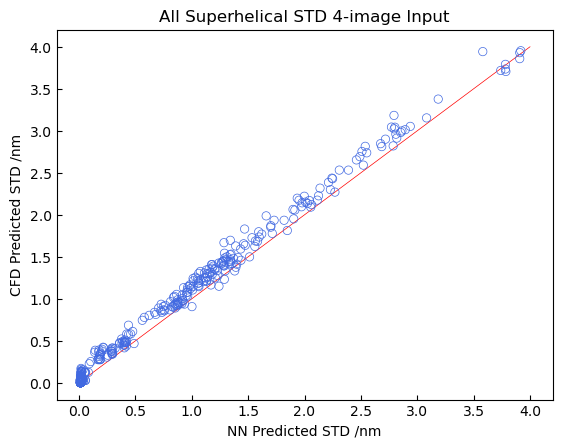

In [14]:
#Testing
test_first_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltest/interval_1"
test_second_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltest/interval_2"
test_third_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltest/interval_3"
test_fourth_dir = r"/Users/kanintantinon/Desktop/AgNO3/superhelical_STD/superhelicaltest/interval_4"

test_dataset = CustomImageDataset(first_dir=test_first_dir, second_dir=test_second_dir, third_dir=test_third_dir, fourth_dir=test_fourth_dir, transform=data_transform)
test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
with torch.no_grad(): # no need to calculate gradient
    squared_difference = 0
    predicted_size_data = []
    CFD_size_data = []
    underestimate = []
    overestimate = []
    for (images1, images2, images3, images4, labels4, cuttimes) in test:
        images1 = images1.to(device)
        images2 = images2.to(device)
        images3 = images3.to(device)    
        images4 = images4.to(device)
        labels4 = labels4.to(device)
        cuttimes = cuttimes.to(device).float()

        #forward
        outputs = model(images1, images2, images3, images4, cuttimes)
    
        # print(predictions)
        squared_difference += (float(outputs) - labels4) ** 2
        predicted_size_data.append(float(outputs))
        CFD_size_data.append(float(labels4))
        if float(outputs) < 0.5 * float(labels4):
            underestimate.append(float(outputs))
        if float(outputs) > 1.5 * float(labels4):
            overestimate.append(float(outputs))
        
    rmse = torch.sqrt(squared_difference / (len(test)))
    print(f'RMSE = {rmse}')
    # print(predicted_size_data)
    # print(CFD_size_data)
    # print(underestimate)
    # print(overestimate)
    x = np.linspace(0, 4, 200)
    plt.plot(x, x, 'red', zorder=1, linewidth = 0.5)
    plt.scatter(predicted_size_data, CFD_size_data, facecolors='none', edgecolors='royalblue', linewidths= 0.5, zorder= 2)
    plt.xlabel('NN Predicted STD /nm')
    plt.ylabel('CFD Predicted STD /nm')
    plt.title('All Superhelical STD 4-image Input')
    plt.tick_params(axis='both', direction='in')
    plt.show()

In [1]:
#save the model
# PATH = r'C:\Users\Chappyyyyyy\Desktop\PartIIB project 2023_2024\MultiInput\size_model.pth'
# torch.save(model.state_dict(), PATH)

NameError: name 'torch' is not defined

In [ ]:
#archived 
# class ConvNet(nn.Module): # note need to find out image size
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.conv1 = nn.Conv2d(1,30,20, padding='same') #in_channels, out_channels, kernel_size
#         self.normalise1 = nn.BatchNorm2d(30)
#         # self.pool = nn.AvgPool2d(5,5) #kernel_size, stride (shift x pixel to the right)
#         self.pool1 = nn.AvgPool2d(10, stride=10)
#         # self.pool1 = nn.MaxPool2d(10, stride=10)
#         self.conv2 = nn.Conv2d(30, 30, 20, padding='same')
#         # self.normalise2 = nn.BatchNorm2d(16)
#         # self.pool2 = nn.AvgPool2d(2, stride=2)
#         self.pool2 = nn.MaxPool2d(2, stride=2)
#         self.conv3 = nn.Conv2d(1, 30, 10, padding='same')
#         # self.normalise3 = nn.BatchNorm2d(32) 
#         self.conv4 = nn.Conv2d(30, 30, 10, padding='same')
#         self.fc0 = nn.Linear(30, 10)
#         self.fc = nn.Linear(32*5*5, 1)
#         self.fc1 = nn.Linear(60, 40)
#         self.fc2 = nn.Linear(40,20)
#         self.fc3 = nn.Linear(20,4)
#         self.dropout = nn.Dropout(0.1)

In [ ]:
# model_test = ConvNet().to(device)
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name, len(param.data))



In [27]:
!pip freeze

aiobotocore @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_71xswk40o_/croot/aiobotocore_1682537536268/work
aiofiles @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_f56ag8l7kr/croot/aiofiles_1683773599608/work
aiohttp @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_76kcgwehai/croot/aiohttp_1694181098663/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_3d75lecab1/croot/aiosqlite_1683773918307/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_6dviz_3v0e/croot/anaconda-anon-usage_1695305101164/work
anaconda-catalogs @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_e8tmw882qa/croot/anaconda-catalogs_1685727305051/work


In [28]:
with open(r"/Volumes/Tae's data/AgNO3/size_folder_superhelical/interval_1/._Fig_72__t-11_molef-agno3_Transformed_size_1.768804e+01_.png", 'rb') as f:
    pass

In [40]:
Image.open(r"/Volumes/TAEdata/AgNO3/size_folder_superhelical/interval_1/._Fig_72__t-11_molef-agno3_Transformed_size_1.768804e+01_.png")

UnidentifiedImageError: cannot identify image file '/Volumes/TAEdata/AgNO3/size_folder_superhelical/interval_1/._Fig_72__t-11_molef-agno3_Transformed_size_1.768804e+01_.png'